In [18]:
# Tutoring myself with pytorch

import torch as t

x = t.rand(3, requires_grad = True)

y = x+2

z = y*y*2

z = z.mean()
y.retain_grad()
z.backward() # dz/dx

print(y.grad)

tensor([3.7199, 3.7495, 3.3422])


In [1]:
from imports import *

with open("data/pythia_val_data_b16.pkl", "rb") as f:
    val_dataloader = pickle.load(f)

model = LanguageModel("EleutherAI/pythia-70m", device_map = "cpu")
print(model)
# with model.trace(inputs["input_ids"]) as tracer:
    
#     output_mlp = model.gpt_neox.layers[0].mlp.dense_4h_to_h.output.grad.save()
#     output_attn = model.gpt_neox.layers[0].attention.dense.output.grad.save()
    
    
#     model.output.logits.sum().backward()

# print(output_mlp)
# print();print()
# print(output_attn)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since roneneldan/TinyStories couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/maheepchaudhary/.cache/huggingface/datasets/roneneldan___tiny_stories/default/0.0.0/f54c09fd23315a6f9c86f9dc80f725de7d8f9c64 (last modified on Sun Sep  8 14:32:36 2024).


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 5/21990 [00:49<60:13:02,  9.86s/it]


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

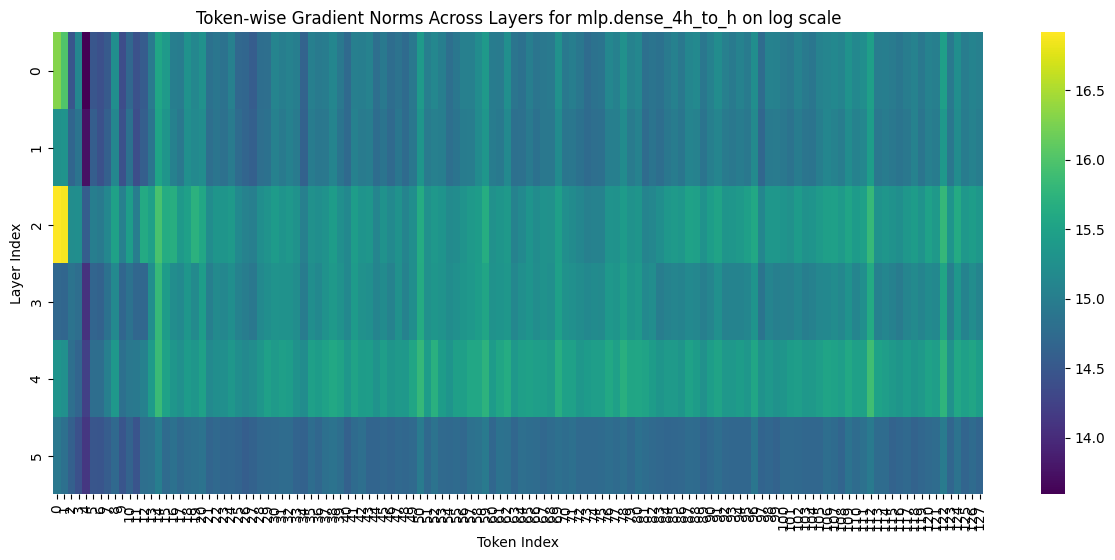

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token
data = load_dataset("roneneldan/TinyStories")
train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)

    if index == 5:
        break


# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.savefig("Pythia_MLP_Grad_50_samples.png")
plt.close

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 100/21990 [15:04<54:59:05,  9.04s/it]


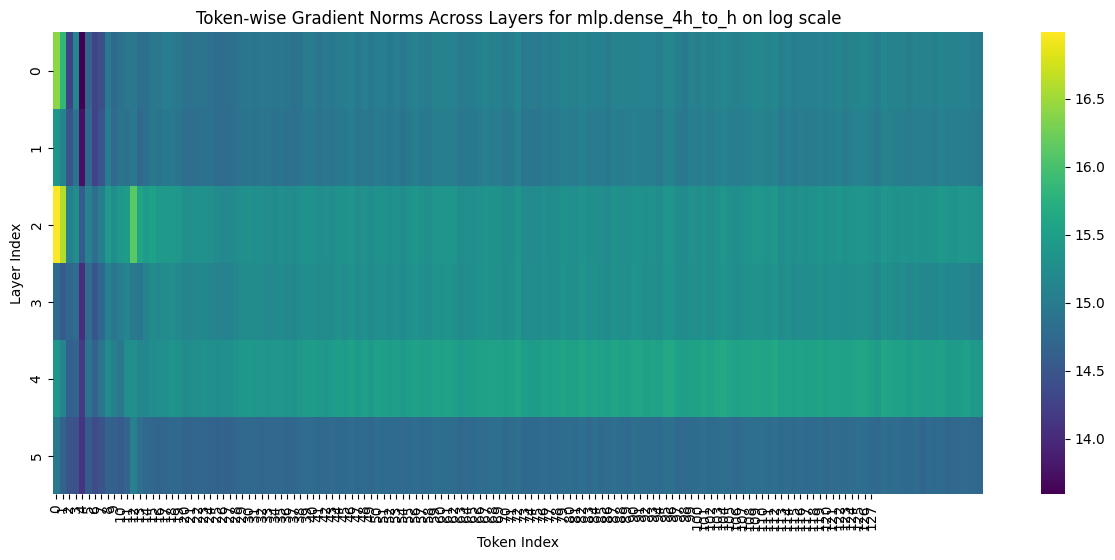

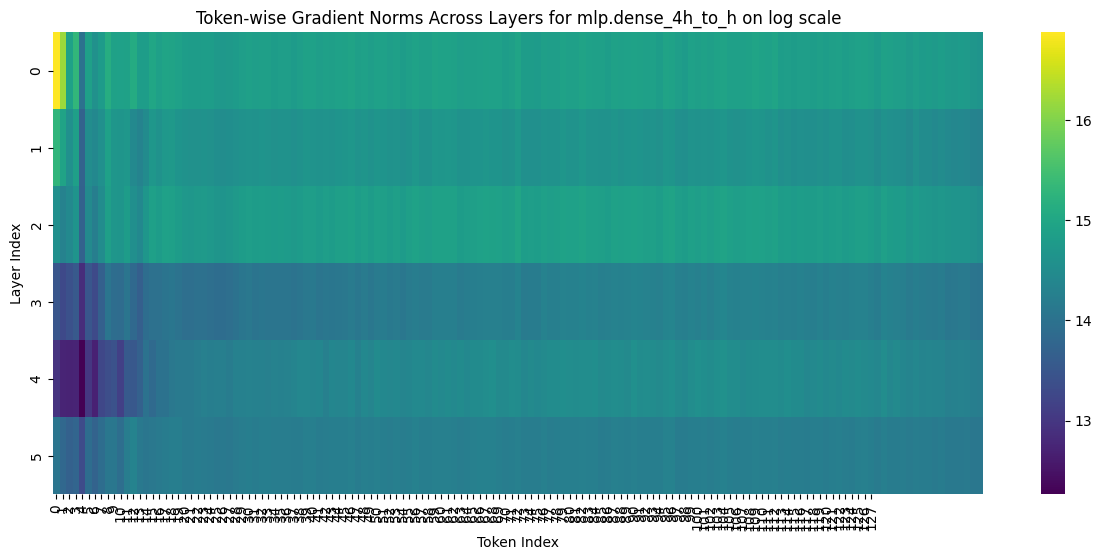

: 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Load and preprocess data
data = load_dataset("roneneldan/TinyStories")
train_data, val_data = inspect_data(data)

model.train()

# Freeze specific layers
model.gpt_neox.embed_in.requires_grad = False
for layer in model.gpt_neox.layers:
    for param in layer.parameters():
        param.requires_grad = False
    for param in layer.mlp.dense_4h_to_h.parameters():
        param.requires_grad = True
    for param in layer.attention.dense.parameters():
        param.requires_grad = True

# Move model to GPU if available
# device = torch.device("mps" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Prepare for gradient collection
final_data = []
attn_final_data = []
num_samples = 400  # Adjust as needed

# Pre-allocate tensors for gradient storage
layer_count = 6
output_dim = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.shape[0]
attn_all_gradients = torch.zeros((num_samples, 128, layer_count, output_dim))
all_gradients = torch.zeros((num_samples, 128, layer_count, output_dim))

for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    attn_token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=145, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        attn_gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
            attn_layer = model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
            attn_param_grad = attn_layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token
            attn_gradients.append(attn_param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)
        attn_token_gradients.append(torch.cat(attn_gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)
    attn_token_gradients_tensor = torch.stack(attn_token_gradients)  # Shape: (seq_len, layer_count, output_dim)
    
    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
    average_attn_gradients_tensor = torch.log(attn_token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)
    attn_final_data.append(average_attn_gradients_tensor)

    if index == 100:
        break
    
# Visualize the results
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.show()
plt.close()

plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(attn_final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.show()
plt.close()

In [11]:
from imports import *

class Gradient_MLP:
    
    def __init__(self, data, device, dataset_name, model_name):
        
        self.model_name = model_name
        
        if self.model_name == "Pythia14m":
            self.model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
            self.tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')
        
        self.tokenizer.pad_token = self.tokenizer.eos_token
        
        self.data = data
        self.device = device
        self.dataset_name = dataset_name
        if self.dataset_name == "tinystories":
            self.max_length = 145
        elif self.dataset_name == "summarisation":
            self.max_length = 340
        elif self.dataset_name == "alpaca":
            self.max_length = 10
        
        self.model.to(device)
        self.model.gpt_neox.embed_in.requires_grad = False
        for layer in self.model.gpt_neox.layers:
            for param in layer.parameters():
                param.requires_grad = False
            for param in layer.mlp.dense_4h_to_h.parameters():
                param.requires_grad = True
            for param in layer.attention.dense.parameters():
                param.requires_grad = True

        
    def forward(self):
        
        final_data = []
        attn_final_data = []
        
        for sample in tqdm(self.data):
        
            token_gradients = []
            attn_token_gradients = []
            
            inputs = self.tokenizer(sample, return_tensors="pt", padding='max_length', max_length=self.max_length, truncation=True)
            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # Get the outputs and compute loss
            outputs = self.model(**inputs)
            logits = outputs.logits
            loss = logits.sum()  # Example loss
            
            # Iterate over each token
            for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
                self.model.zero_grad()  # Clear any previous gradients
            
                # Compute loss only for this specific token's contribution
                # Modify this if needed to focus on the exact component of the loss related to the token
                token_loss = logits[0, token_idx, :].sum()
                token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
                # Collect the gradient of the specific parameter for this token
                gradients = []
                attn_gradients = []
                num_layers = len(self.model.gpt_neox.layers)
                for i in range(num_layers):
                    layer = self.model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
                    attn_layer = self.model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
                    attn_param_grad = attn_layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    param_grad = layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token
                    attn_gradients.append(attn_param_grad.unsqueeze(0))  # Append the gradient for this token
                    torch.cuda.empty_cache()
                # Convert gradients to a tensor and add to the list
                token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)
                attn_token_gradients.append(torch.cat(attn_gradients, dim=0))  # Shape: (layer_count, output_dim)

            # Convert token gradients to a tensor for visualization
            token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            attn_token_gradients_tensor = torch.stack(attn_token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            # Compute the average gradient norm across layers for visualization
            average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            average_attn_gradients_tensor = torch.log(attn_token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            final_data.append(average_gradients_tensor)
            attn_final_data.append(average_attn_gradients_tensor)
            
            torch.cuda.empty_cache()
        try:
            os.makedirs(f"data/{self.dataset_name}/{self.model_name}")
        except:
            pass
        
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_mlp.pkl", "wb") as f:
            pickle.dump(final_data, f)
            
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_attention.pkl", "wb") as f:
            pickle.dump(attn_final_data, f)
        
        final_data_cpu = [tensor.cpu() for tensor in final_data]
        attn_final_data_cpu = [tensor.cpu() for tensor in attn_final_data]
        self.visualise(final_data_cpu, average_gradients_tensor, name = "MLP", title = "mlp.dense_4h_to_h")
        self.visualise(attn_final_data_cpu, average_attn_gradients_tensor, name = "Attention", title = "attention.dense")

        torch.cuda.empty_cache()

    def visualise(self, final_data, average_gradients_tensor, name, title):

        # Visualize the gradients using a heatmap
        plt.figure(figsize=(15, 11))
        sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
        plt.xlabel('Token Index')
        plt.ylabel('Layer Index')
        plt.title(f'[{self.model_name}-{self.dataset_name}]Token-wise Gradient for {title} on log scale')
        plt.show()
        
class config:
    
    def __init__(self, device, model_name, data_name):
        self.device = device
        self.model_name = model_name
        self.data_name = data_name


    def model_selection(self):
        if self.model_name == "Pythia14m":
            model = LanguageModel("EleutherAI/pythia-14m", device_map=self.device)
        elif self.model_name == "Pythia70m":
            model = LanguageModel("EleutherAI/pythia-70m", device_map=self.device)
        elif self.model_name == "Pythia160m":
            model = LanguageModel("EleutherAI/pythia-160m", device_map=self.device)
        elif self.model_name == "Pythia410m":
            model = LanguageModel("EleutherAI/pythia-410m", device_map=self.device)
        elif self.model_name == "Pythia1b":
            model = LanguageModel("EleutherAI/pythia-1b", device_map=self.device)
        elif self.model_name == "Pythia1.4b":
            model = LanguageModel("EleutherAI/pythia-1.4b", device_map=self.device)
        elif self.model_name == "Pythia2.8b":
            model = LanguageModel("EleutherAI/pythia-2.8b", device_map=self.device)
        elif self.model_name == "Pythia6.9b":
            model = LanguageModel("EleutherAI/pythia-6.9b", device_map=self.device)
        elif self.model_name == "Pythia12b":
            model = LanguageModel("EleutherAI/pythia-12b", device_map=self.device)
        
        return model

    def data_selection(self):
        
        if self.data_name == "tinystories":
            pre_data = load_dataset("roneneldan/TinyStories")
            data = pre_data["validation"]['text'] # as we are experimenting on the validation dataset. 
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "alpaca":
            pre_data_alpaca = load_dataset("tatsu-lab/alpaca")
            data = pre_data_alpaca["train"]["instruction"]
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "summarisation":
            data_summarisation = load_dataset("Lots-of-LoRAs/task298_storycloze_correct_end_classification", name="default")
            new_data = data_summarisation["train"]["input"]
            final_data = self.process_data_selection(new_data)
        
        return final_data
    
    def process_data_selection(self, data):
        
        '''
        The purpose of this function is to select 500 samples from each dataset of their average length
        - TinyStories: 177
        - Alpaca: 50
        - Summarisation: 1100
        '''
        
        if self.data_name == "tinystories":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 143 or len(sent.split()) == 142:
                    new_data.append(sent)
                if len(new_data) == 400:
                    break
                
        elif self.data_name == "alpaca":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 7:
                    new_data.append(sent)
                if len(new_data) == 400:
                    break
        elif self.data_name == "summarisation":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) > 310 or len(sent.split()) < 320:
                    new_data.append(sent)
                if len(new_data) == 400:
                    break
        
        assert len(new_data) == 400
        
        return new_data


100%|██████████| 400/400 [13:03<00:00,  1.96s/it]


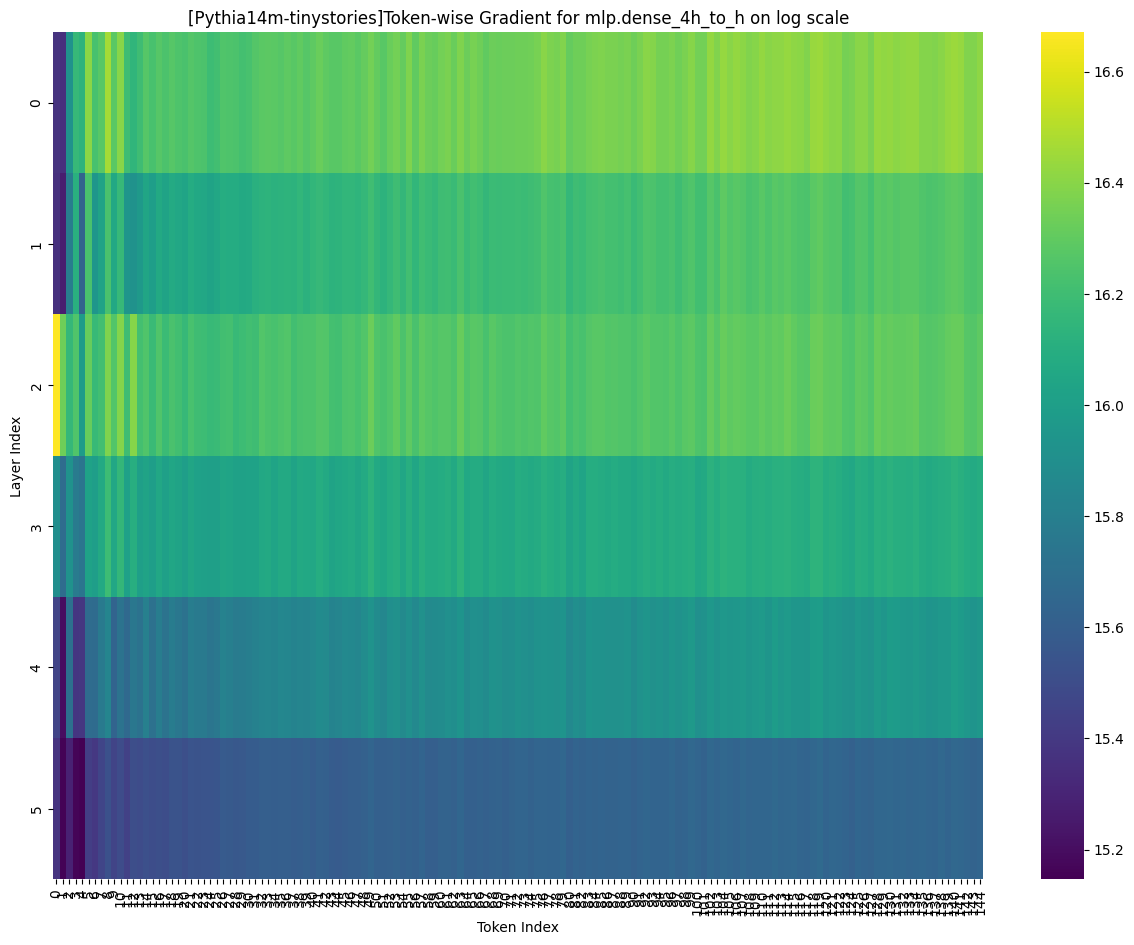

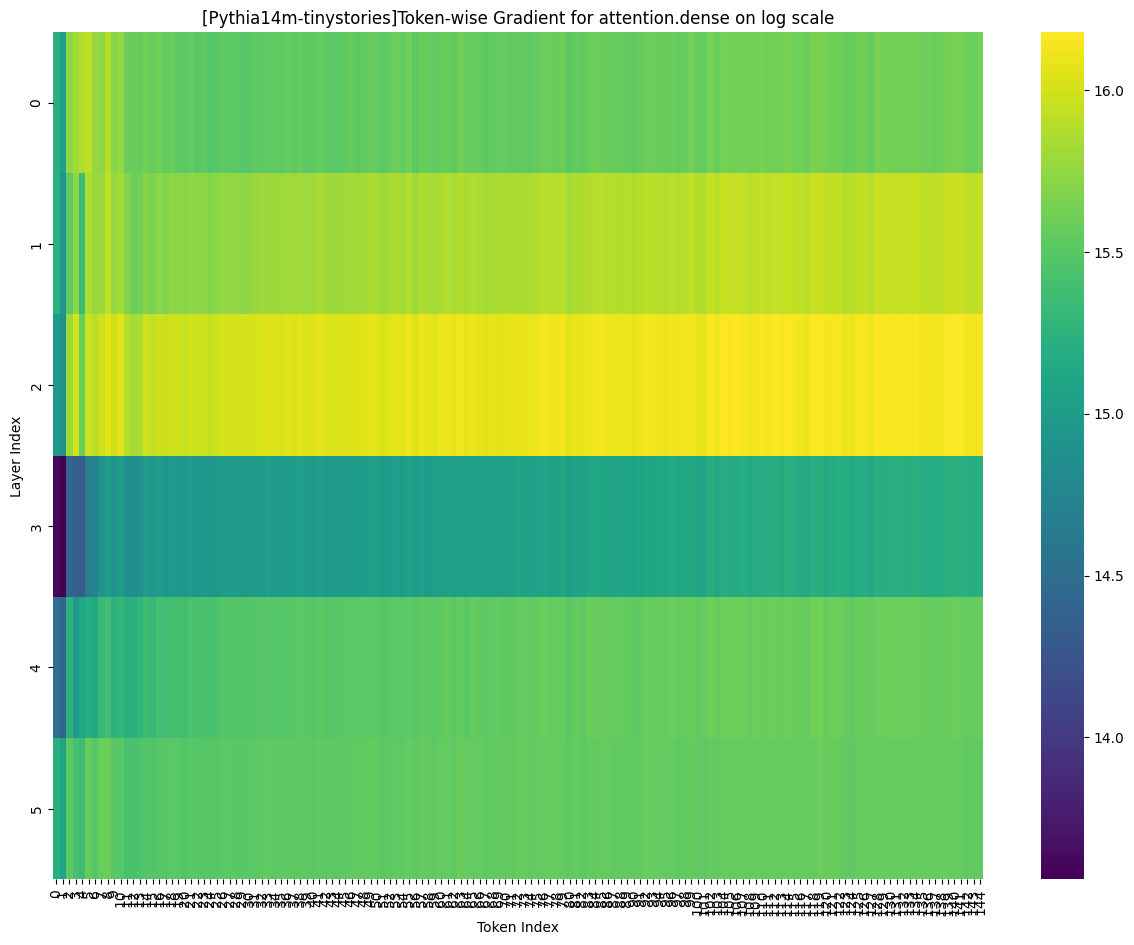

In [12]:
configuration = config(device = "mps", model_name = "Pythia14m", data_name = "tinystories")
data = configuration.data_selection()
model = configuration.model_selection()

Gradient_MLP(data, "mps", "tinystories", "Pythia14m").forward()

100%|██████████| 100/100 [03:13<00:00,  1.93s/it]


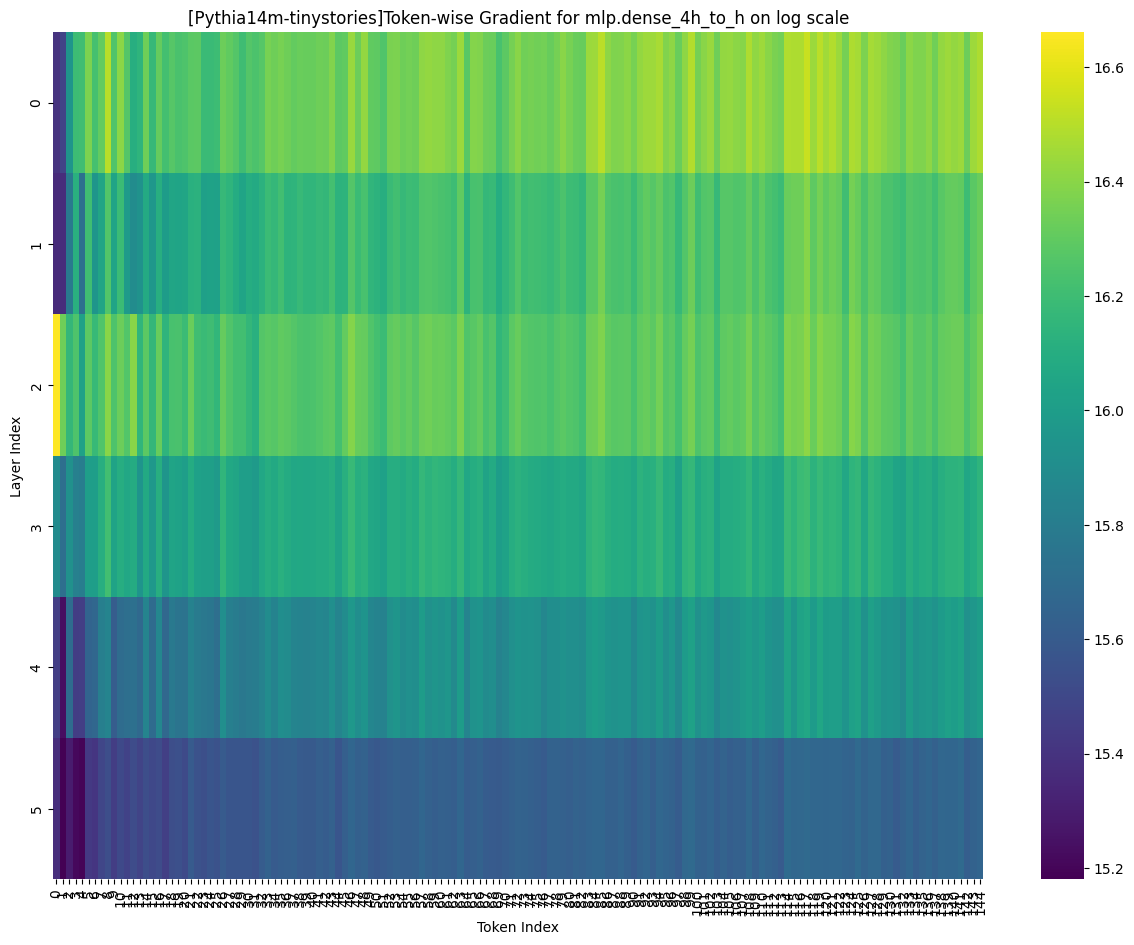

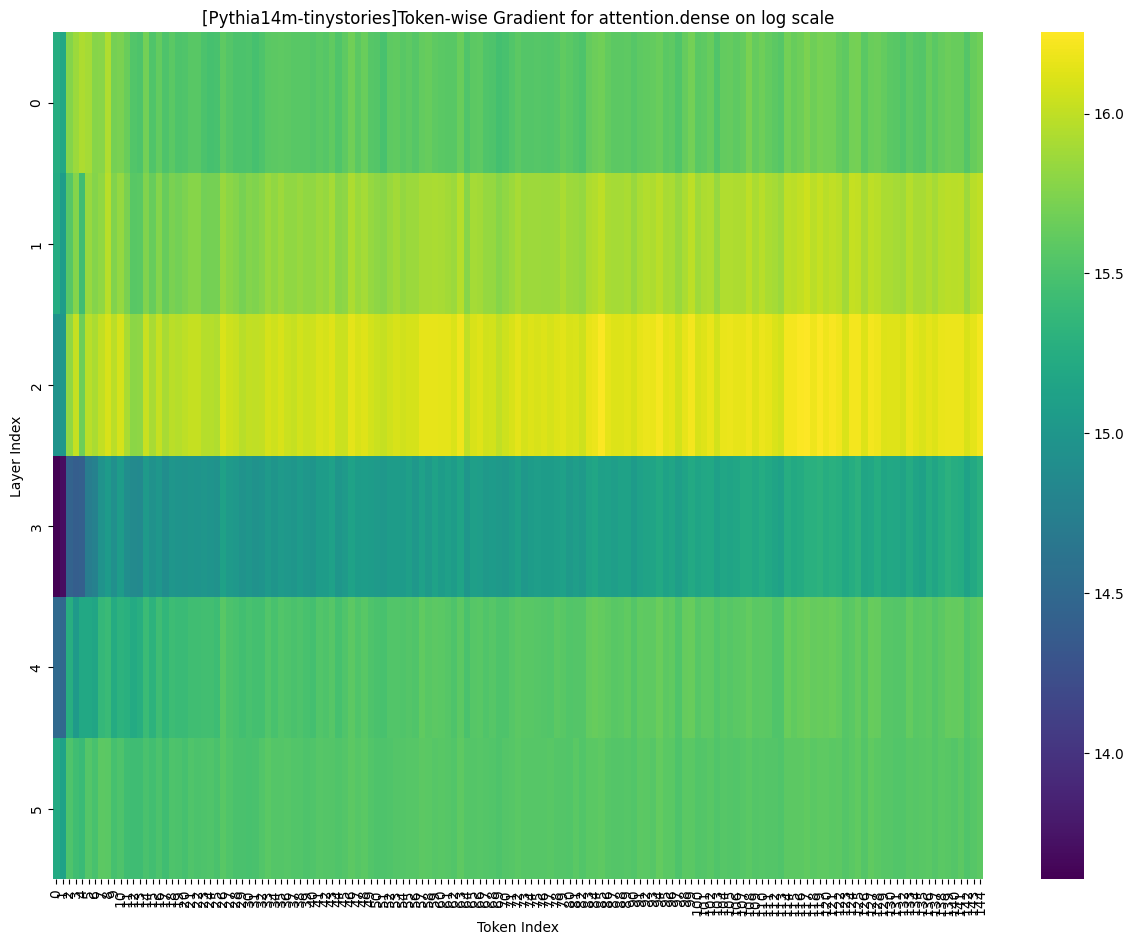

In [10]:
from imports import *

class Gradient_MLP:
    
    def __init__(self, data, device, dataset_name, model_name):
        
        self.model_name = model_name
        
        if self.model_name == "Pythia14m":
            self.model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
            self.tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')
        
        self.tokenizer.pad_token = self.tokenizer.eos_token
        
        self.data = data
        self.device = device
        self.dataset_name = dataset_name
        if self.dataset_name == "tinystories":
            self.max_length = 145
        elif self.dataset_name == "summarisation":
            self.max_length = 340
        elif self.dataset_name == "alpaca":
            self.max_length = 10
        
        self.model.to(device)
        self.model.gpt_neox.embed_in.requires_grad = False
        for layer in self.model.gpt_neox.layers:
            for param in layer.parameters():
                param.requires_grad = False
            for param in layer.mlp.dense_4h_to_h.parameters():
                param.requires_grad = True
            for param in layer.attention.dense.parameters():
                param.requires_grad = True

        
    def forward(self):
        
        final_data = []
        attn_final_data = []
        
        for sample in tqdm(self.data):
        
            token_gradients = []
            attn_token_gradients = []
            
            inputs = self.tokenizer(sample, return_tensors="pt", padding='max_length', max_length=self.max_length, truncation=True)
            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # Get the outputs and compute loss
            outputs = self.model(**inputs)
            logits = outputs.logits
            loss = logits.sum()  # Example loss
            
            # Iterate over each token
            for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
                self.model.zero_grad()  # Clear any previous gradients
            
                # Compute loss only for this specific token's contribution
                # Modify this if needed to focus on the exact component of the loss related to the token
                token_loss = logits[0, token_idx, :].sum()
                token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
                # Collect the gradient of the specific parameter for this token
                gradients = []
                attn_gradients = []
                num_layers = len(self.model.gpt_neox.layers)
                for i in range(num_layers):
                    layer = self.model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
                    attn_layer = self.model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
                    attn_param_grad = attn_layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    param_grad = layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token
                    attn_gradients.append(attn_param_grad.unsqueeze(0))  # Append the gradient for this token
                    torch.cuda.empty_cache()
                # Convert gradients to a tensor and add to the list
                token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)
                attn_token_gradients.append(torch.cat(attn_gradients, dim=0))  # Shape: (layer_count, output_dim)

            # Convert token gradients to a tensor for visualization
            token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            attn_token_gradients_tensor = torch.stack(attn_token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            # Compute the average gradient norm across layers for visualization
            average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            average_attn_gradients_tensor = torch.log(attn_token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            final_data.append(average_gradients_tensor)
            attn_final_data.append(average_attn_gradients_tensor)
            
            torch.cuda.empty_cache()
        try:
            os.makedirs(f"data/{self.dataset_name}/{self.model_name}")
        except:
            pass
        
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_mlp.pkl", "wb") as f:
            pickle.dump(final_data, f)
            
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_attention.pkl", "wb") as f:
            pickle.dump(attn_final_data, f)
        
        final_data_cpu = [tensor.cpu() for tensor in final_data]
        attn_final_data_cpu = [tensor.cpu() for tensor in attn_final_data]
        self.visualise(final_data_cpu, average_gradients_tensor, name = "MLP", title = "mlp.dense_4h_to_h")
        self.visualise(attn_final_data_cpu, average_attn_gradients_tensor, name = "Attention", title = "attention.dense")

        torch.cuda.empty_cache()

    def visualise(self, final_data, average_gradients_tensor, name, title):

        # Visualize the gradients using a heatmap
        plt.figure(figsize=(15, 11))
        sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
        plt.xlabel('Token Index')
        plt.ylabel('Layer Index')
        plt.title(f'[{self.model_name}-{self.dataset_name}]Token-wise Gradient for {title} on log scale')
        # plt.savefig(f"figures/{self.dataset_name}/{self.model_name}/gradient_{name}.png")
        plt.show()
        
class config:
    
    def __init__(self, device, model_name, data_name):
        self.device = device
        self.model_name = model_name
        self.data_name = data_name


    def model_selection(self):
        if self.model_name == "Pythia14m":
            model = LanguageModel("EleutherAI/pythia-14m", device_map=self.device)
        elif self.model_name == "Pythia70m":
            model = LanguageModel("EleutherAI/pythia-70m", device_map=self.device)
        elif self.model_name == "Pythia160m":
            model = LanguageModel("EleutherAI/pythia-160m", device_map=self.device)
        elif self.model_name == "Pythia410m":
            model = LanguageModel("EleutherAI/pythia-410m", device_map=self.device)
        elif self.model_name == "Pythia1b":
            model = LanguageModel("EleutherAI/pythia-1b", device_map=self.device)
        elif self.model_name == "Pythia1.4b":
            model = LanguageModel("EleutherAI/pythia-1.4b", device_map=self.device)
        elif self.model_name == "Pythia2.8b":
            model = LanguageModel("EleutherAI/pythia-2.8b", device_map=self.device)
        elif self.model_name == "Pythia6.9b":
            model = LanguageModel("EleutherAI/pythia-6.9b", device_map=self.device)
        elif self.model_name == "Pythia12b":
            model = LanguageModel("EleutherAI/pythia-12b", device_map=self.device)
        
        return model

    def data_selection(self):
        
        if self.data_name == "tinystories":
            pre_data = load_dataset("roneneldan/TinyStories")
            data = pre_data["validation"]['text'] # as we are experimenting on the validation dataset. 
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "alpaca":
            pre_data_alpaca = load_dataset("tatsu-lab/alpaca")
            data = pre_data_alpaca["train"]["instruction"]
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "summarisation":
            data_summarisation = load_dataset("Lots-of-LoRAs/task298_storycloze_correct_end_classification", name="default")
            new_data = data_summarisation["train"]["input"]
            final_data = self.process_data_selection(new_data)
        
        return final_data
    
    def process_data_selection(self, data):
        
        '''
        The purpose of this function is to select 500 samples from each dataset of their average length
        - TinyStories: 177
        - Alpaca: 50
        - Summarisation: 1100
        '''
        
        if self.data_name == "tinystories":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 143 or len(sent.split()) == 142:
                    new_data.append(sent)
                if len(new_data) == 100:
                    break
                
        elif self.data_name == "alpaca":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 7:
                    new_data.append(sent)
                if len(new_data) == 100:
                    break
        elif self.data_name == "summarisation":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) > 310 or len(sent.split()) < 320:
                    new_data.append(sent)
                if len(new_data) == 100:
                    break
        
        assert len(new_data) == 100
        
        return new_data

configuration = config(device = "mps", model_name = "Pythia14m", data_name = "tinystories")
data = configuration.data_selection()
model = configuration.model_selection()

Gradient_MLP(data, "mps", "tinystories", "Pythia14m").forward()

100%|██████████| 50/50 [01:31<00:00,  1.84s/it]


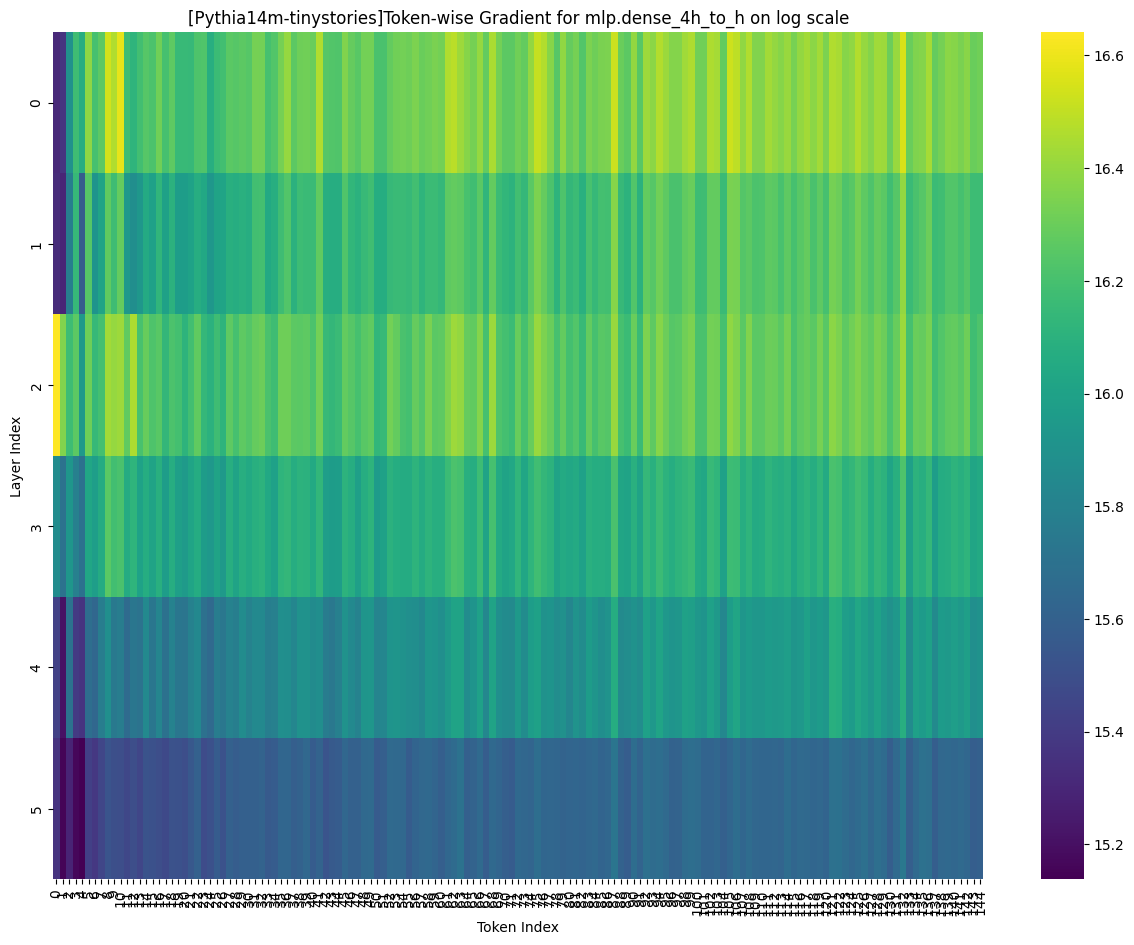

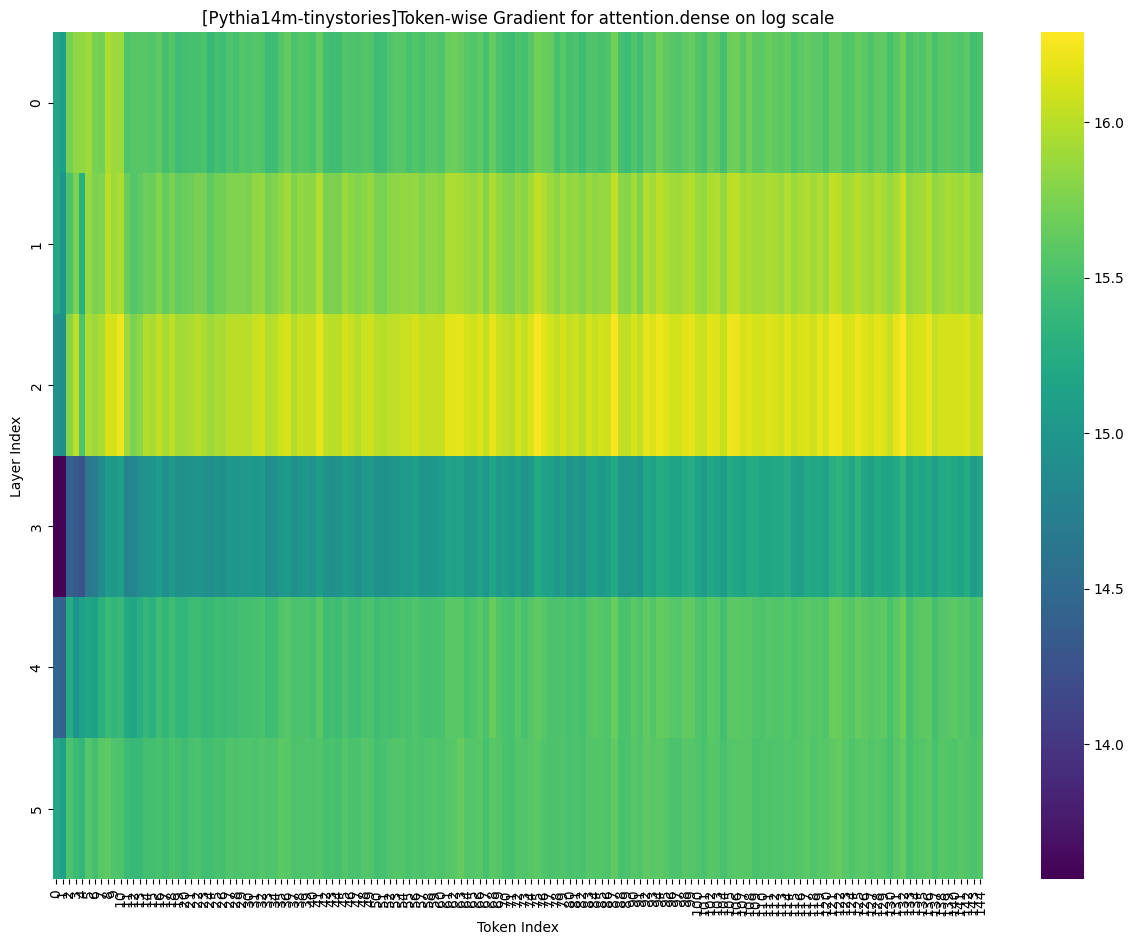

In [13]:
from imports import *

class Gradient_MLP:
    
    def __init__(self, data, device, dataset_name, model_name):
        
        self.model_name = model_name
        
        if self.model_name == "Pythia14m":
            self.model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
            self.tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')
        
        self.tokenizer.pad_token = self.tokenizer.eos_token
        
        self.data = data
        self.device = device
        self.dataset_name = dataset_name
        if self.dataset_name == "tinystories":
            self.max_length = 145
        elif self.dataset_name == "summarisation":
            self.max_length = 340
        elif self.dataset_name == "alpaca":
            self.max_length = 10
        
        self.model.to(device)
        self.model.gpt_neox.embed_in.requires_grad = False
        for layer in self.model.gpt_neox.layers:
            for param in layer.parameters():
                param.requires_grad = False
            for param in layer.mlp.dense_4h_to_h.parameters():
                param.requires_grad = True
            for param in layer.attention.dense.parameters():
                param.requires_grad = True

        
    def forward(self):
        
        final_data = []
        attn_final_data = []
        
        for sample in tqdm(self.data):
        
            token_gradients = []
            attn_token_gradients = []
            
            inputs = self.tokenizer(sample, return_tensors="pt", padding='max_length', max_length=self.max_length, truncation=True)
            inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # Get the outputs and compute loss
            outputs = self.model(**inputs)
            logits = outputs.logits
            loss = logits.sum()  # Example loss
            
            # Iterate over each token
            for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
                self.model.zero_grad()  # Clear any previous gradients
            
                # Compute loss only for this specific token's contribution
                # Modify this if needed to focus on the exact component of the loss related to the token
                token_loss = logits[0, token_idx, :].sum()
                token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
                # Collect the gradient of the specific parameter for this token
                gradients = []
                attn_gradients = []
                num_layers = len(self.model.gpt_neox.layers)
                for i in range(num_layers):
                    layer = self.model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
                    attn_layer = self.model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
                    attn_param_grad = attn_layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    param_grad = layer.weight.grad.clone().view(-1).detach().cpu()  # Clone, detach, and move to CPU
                    gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token
                    attn_gradients.append(attn_param_grad.unsqueeze(0))  # Append the gradient for this token
                    torch.cuda.empty_cache()
                # Convert gradients to a tensor and add to the list
                token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)
                attn_token_gradients.append(torch.cat(attn_gradients, dim=0))  # Shape: (layer_count, output_dim)

            # Convert token gradients to a tensor for visualization
            token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            attn_token_gradients_tensor = torch.stack(attn_token_gradients)  # Shape: (seq_len, layer_count, output_dim)
            # Compute the average gradient norm across layers for visualization
            average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            average_attn_gradients_tensor = torch.log(attn_token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
            final_data.append(average_gradients_tensor)
            attn_final_data.append(average_attn_gradients_tensor)
            
            torch.cuda.empty_cache()
        try:
            os.makedirs(f"data/{self.dataset_name}/{self.model_name}")
        except:
            pass
        
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_mlp.pkl", "wb") as f:
            pickle.dump(final_data, f)
            
        with open(f"data/{self.dataset_name}/{self.model_name}/gradient_attention.pkl", "wb") as f:
            pickle.dump(attn_final_data, f)
        
        final_data_cpu = [tensor.cpu() for tensor in final_data]
        attn_final_data_cpu = [tensor.cpu() for tensor in attn_final_data]
        self.visualise(final_data_cpu, average_gradients_tensor, name = "MLP", title = "mlp.dense_4h_to_h")
        self.visualise(attn_final_data_cpu, average_attn_gradients_tensor, name = "Attention", title = "attention.dense")

        torch.cuda.empty_cache()

    def visualise(self, final_data, average_gradients_tensor, name, title):

        # Visualize the gradients using a heatmap
        plt.figure(figsize=(15, 11))
        sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
        plt.xlabel('Token Index')
        plt.ylabel('Layer Index')
        plt.title(f'[{self.model_name}-{self.dataset_name}]Token-wise Gradient for {title} on log scale')
        # plt.savefig(f"figures/{self.dataset_name}/{self.model_name}/gradient_{name}.png")
        plt.show()
        
class config:
    
    def __init__(self, device, model_name, data_name):
        self.device = device
        self.model_name = model_name
        self.data_name = data_name


    def model_selection(self):
        if self.model_name == "Pythia14m":
            model = LanguageModel("EleutherAI/pythia-14m", device_map=self.device)
        elif self.model_name == "Pythia70m":
            model = LanguageModel("EleutherAI/pythia-70m", device_map=self.device)
        elif self.model_name == "Pythia160m":
            model = LanguageModel("EleutherAI/pythia-160m", device_map=self.device)
        elif self.model_name == "Pythia410m":
            model = LanguageModel("EleutherAI/pythia-410m", device_map=self.device)
        elif self.model_name == "Pythia1b":
            model = LanguageModel("EleutherAI/pythia-1b", device_map=self.device)
        elif self.model_name == "Pythia1.4b":
            model = LanguageModel("EleutherAI/pythia-1.4b", device_map=self.device)
        elif self.model_name == "Pythia2.8b":
            model = LanguageModel("EleutherAI/pythia-2.8b", device_map=self.device)
        elif self.model_name == "Pythia6.9b":
            model = LanguageModel("EleutherAI/pythia-6.9b", device_map=self.device)
        elif self.model_name == "Pythia12b":
            model = LanguageModel("EleutherAI/pythia-12b", device_map=self.device)
        
        return model

    def data_selection(self):
        
        if self.data_name == "tinystories":
            pre_data = load_dataset("roneneldan/TinyStories")
            data = pre_data["validation"]['text'] # as we are experimenting on the validation dataset. 
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "alpaca":
            pre_data_alpaca = load_dataset("tatsu-lab/alpaca")
            data = pre_data_alpaca["train"]["instruction"]
            final_data = self.process_data_selection(data)
        
        elif self.data_name == "summarisation":
            data_summarisation = load_dataset("Lots-of-LoRAs/task298_storycloze_correct_end_classification", name="default")
            new_data = data_summarisation["train"]["input"]
            final_data = self.process_data_selection(new_data)
        
        return final_data
    
    def process_data_selection(self, data):
        
        '''
        The purpose of this function is to select 500 samples from each dataset of their average length
        - TinyStories: 177
        - Alpaca: 50
        - Summarisation: 1100
        '''
        
        if self.data_name == "tinystories":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 143 or len(sent.split()) == 142:
                    new_data.append(sent)
                if len(new_data) == 50:
                    break
                
        elif self.data_name == "alpaca":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) == 7:
                    new_data.append(sent)
                if len(new_data) == 50:
                    break
        elif self.data_name == "summarisation":
            shuffled_text = random.sample(data, len(data))
            new_data = []
            for sent in shuffled_text:
                if len(sent.split()) > 310 or len(sent.split()) < 320:
                    new_data.append(sent)
                if len(new_data) == 50:
                    break
        
        assert len(new_data) == 50
        
        return new_data

configuration = config(device = "mps", model_name = "Pythia14m", data_name = "tinystories")
data = configuration.data_selection()
model = configuration.model_selection()

Gradient_MLP(data, "mps", "tinystories", "Pythia14m").forward()

In [52]:
from imports import *

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')
tokenizer.pad_token = tokenizer.eos_token

for params in model.parameters():
    params.requires_grad = True

# Tokenize input sentence (input features are tokens)
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, padding=True, max_length=145, return_tensors='pt')
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=145, truncation=True)

# Extract input_ids from tokenized inputs
input_ids = inputs['input_ids']

# Get the input embeddings from the model's embedding layer
# with torch.no_grad():  # Disable gradient computation temporarily
input_embeds = model.gpt_neox.embed_in(input_ids)

# Now, make input_embeds a leaf tensor and require gradients
input_embeds = input_embeds.clone().detach().requires_grad_(True)

# Forward pass through the model using token embeddings instead of input_ids
outputs = model(inputs_embeds=input_embeds)
last_hidden_state = outputs.logits  # Model output (logits)

# Define a dummy target and compute loss (for example purposes)
target = torch.zeros_like(last_hidden_state)  # Dummy target
# loss_fn = t.nn.CrossEntropyLoss()
# loss = loss_fn(last_hidden_state, target)
loss = last_hidden_state.sum()

# Backward pass to compute gradients w.r.t. model weights and inputs
loss.backward()


# Gradients w.r.t the model's weights (e.g., specific layers like mlp.dense)
# weight_gradients0 = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.grad
# weight_gradients1 = model.gpt_neox.layers[1].mlp.dense_4h_to_h.weight.grad
# weight_gradients2 = model.gpt_neox.layers[2].mlp.dense_4h_to_h.weight.grad
# weight_gradients3 = model.gpt_neox.layers[3].mlp.dense_4h_to_h.weight.grad
# weight_gradients4 = model.gpt_neox.layers[4].mlp.dense_4h_to_h.weight.grad
# weight_gradients5 = model.gpt_neox.layers[5].mlp.dense_4h_to_h.weight.grad

# Compute gradient w.r.t. token embeddings (input features)
input_token_gradients = input_embeds.grad

# weight_gradients0/input_token_gradients
# print(input_token_gradients)


embed_out_grad = model.embed_out.weight.grad
print(embed_out_grad.size())
# print(last_hidden_state.size())
# print(model.gpt_neox.final_layer_norm.weight.grad.size())
# print(model.gpt_neox.layers[-1].mlp.dense_4h_to_h.weight.grad.size())
print(model)

tokens = tokenizer.encode(input_text, return_tensors="pt", padding='max_length', max_length=145, truncation=True)
print(embed_out_grad.mean())
print()

for token_idx in range(tokens.shape[1]):
    token_gradients = embed_out_grad[token_idx]
    
    print(token_gradients.mean())

torch.Size([50304, 128])
GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 128)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=128, out_features=384, bias=True)
          (dense): Linear(in_features=128, out_features=128, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=128, out_features=512, bias=True)
          (dense_4h_to_h): Linear(in_features=512, out_features=12

Jacobian for output dimension 1:
torch.Size([1, 128])
Jacobian for output dimension 2:
torch.Size([1, 128])
Jacobian for output dimension 3:
torch.Size([1, 128])
Jacobian for output dimension 4:
torch.Size([1, 128])
Jacobian for output dimension 5:
torch.Size([1, 128])
Jacobian for output dimension 6:
torch.Size([1, 128])
Jacobian for output dimension 7:
torch.Size([1, 128])
Jacobian for output dimension 8:
torch.Size([1, 128])
Jacobian for output dimension 9:
torch.Size([1, 128])
Jacobian for output dimension 10:
torch.Size([1, 128])


In [18]:
input_token

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [21]:
import numpy as np

# Initialize a list to store the results for each layer
all_p = []

# Iterate over each layer
for layer_idx in range(6):
    p = []
    weight_gradients = eval(f'weight_gradients{layer_idx}')
    
    for i in range(input_token_gradients.squeeze(0).size(0)):
        token_grad = input_token_gradients[:, i, :].unsqueeze(-1)  # Shape: (1, 128, 1)
        p.append(weight_gradients / token_grad)
    print(np.array(p).shape)  # Correct usage of shape attribute
    all_p.append(np.linalg.norm(np.array(p).squeeze().reshape(np.array(p).shape[0], -1), axis=-1))  # Correct usage of np.linalg.norm
# print(all_p)

(145, 1, 128, 512)
(145, 1, 128, 512)
(145, 1, 128, 512)
(145, 1, 128, 512)
(145, 1, 128, 512)
(145, 1, 128, 512)
[array([1.26487805e+03, 2.23120020e+04, 1.90448718e+03, 1.64546191e+03,
       3.58048413e+03, 2.71271523e+04, 4.92857764e+03, 1.08964294e+03,
       5.08036445e+04, 2.29174951e+03, 4.41373555e+04, 3.49586230e+03,
       6.21055298e+02, 6.79580273e+03, 6.05622119e+03, 1.95889917e+03,
       7.10282188e+04, 1.21498789e+04, 3.62842456e+03, 4.65472266e+03,
       2.16680249e+03, 6.55189844e+03, 2.81343062e+05, 1.18965938e+04,
       3.43184033e+03, 1.21102336e+05, 6.65851318e+03, 9.61649707e+03,
       2.63628296e+03, 2.52302100e+03, 8.23994336e+03, 4.26384570e+03,
       1.84111865e+03, 1.14385950e+03, 8.85743848e+03, 6.76945938e+04,
       2.80561719e+03, 5.21381982e+03, 9.80741250e+04, 8.88343359e+03,
       8.19955859e+03, 8.50387344e+04, 9.28491602e+03, 6.48033447e+03,
       4.27113086e+03, 2.57734253e+03, 4.13092334e+03, 1.00120801e+04,
       1.78661426e+03, 6.33835059

[[ 7.142731  10.01288    7.551968   7.4057765  8.183253  10.20829
   8.502806   6.993605  10.835723   7.7370706 10.695062   8.159335
   6.4314203  8.82406    8.708841   7.5801377 11.170833   9.405074
   8.196554   8.445638   7.681008   8.78751   12.54733    9.384007
   8.140852  11.7043915  8.803652   9.171235   7.8771253  7.8332124
   9.016748   8.357926   7.5181284  7.0421634  9.089013  11.122762
   7.9393787  8.559068  11.493479   9.091944   9.011836  11.3508625
   9.136147   8.776527   8.359633   7.854514   8.326256   9.211548
   7.4880776  8.754374   9.504062   9.911188   9.212675   8.277929
   9.07618    7.6501493  9.464246   8.047843   9.507492   9.248541
   7.917451   8.764829   9.046136   9.182094   8.125465   9.020515
   9.421753   9.0445175  8.681914   7.4301167  9.829337   8.515305
   9.04278   10.496029   9.507275   8.063651   8.955513   9.616806
   7.931799   7.9041624  8.280957   8.147203   7.770113   8.897391
   9.250882   9.3910265 10.462219   7.73865    8.2586975 10.5

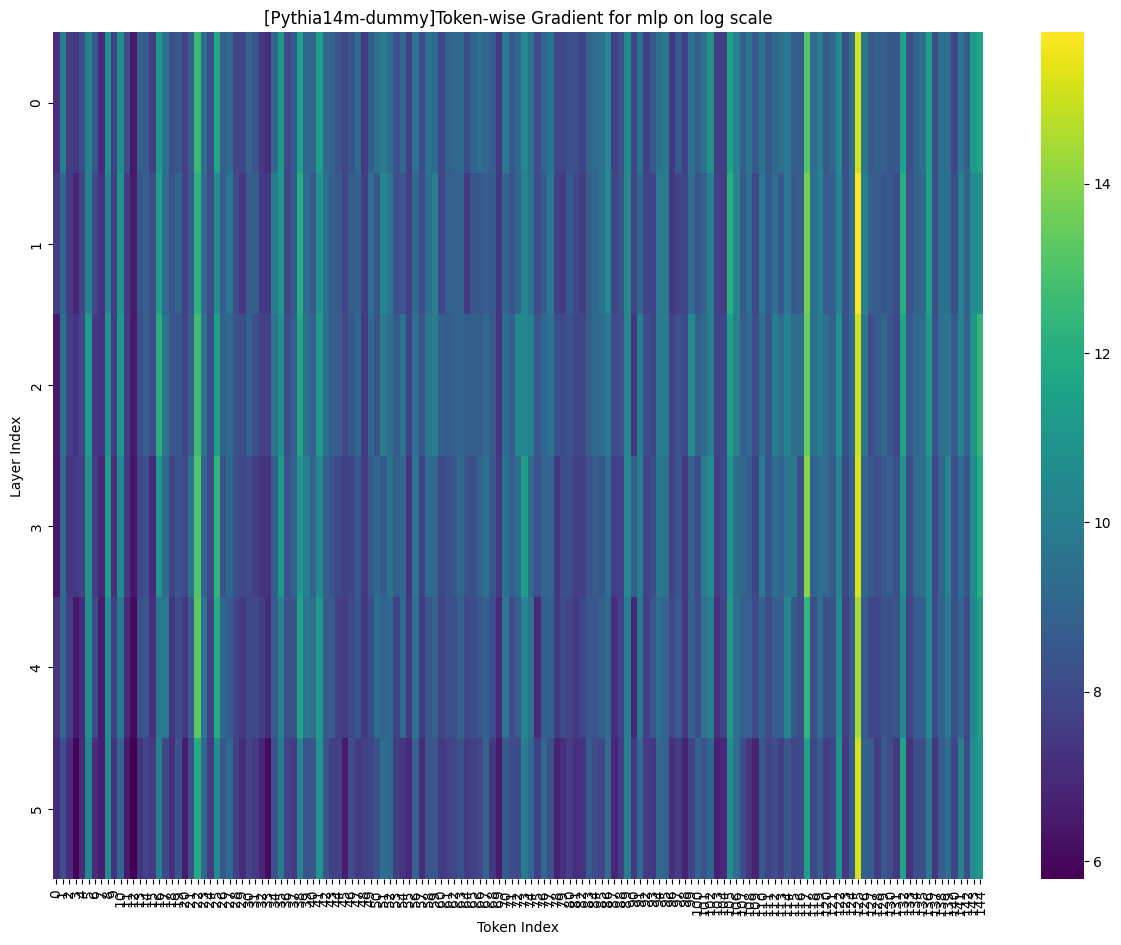

In [22]:
# Ensure all_p is a numpy array
all_p_array = np.array(all_p)
all_p_array = np.log(all_p_array)

# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(all_p_array, cmap='viridis', cbar=True, yticklabels=range(all_p_array.shape[0]), xticklabels=range(all_p_array.shape[1]))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title(f'[Pythia14m-dummy]Token-wise Gradient for mlp on log scale')
# plt.savefig(f"figures/{self.dataset_name}/{self.model_name}/gradient_{name}.png")
plt.show()

In [52]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 128)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=128, out_features=384, bias=True)
          (dense): Linear(in_features=128, out_features=128, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=128, out_features=512, bias=True)
          (dense_4h_to_h): Linear(in_features=512, out_features=128, bias=True)
          (

In [12]:
import torch
import torch as t
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Ensure the model is in training mode
model.train()

# Sample input texts for batch processing
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'


# Tokenize the batch of input texts
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

# Forward pass
outputs = model(**inputs)
logits = outputs.logits

loss_fn = torch.nn.CrossEntropyLoss()

# Initialize a tensor to hold all token losses
batch_size, seq_length, _ = logits.size()
all_token_losses = []

# Calculate token losses
for token_idx in range(seq_length):
    logit_tokens = logits[:, token_idx, :]  
    label_tokens = inputs["input_ids"][:, token_idx]  
    
    token_loss = loss_fn(logit_tokens, label_tokens)  
    all_token_losses.append(token_loss)

# Stack token losses into a tensor
all_token_losses_tensor = torch.stack(all_token_losses)

# Define a function to compute the total loss for a given set of model parameters
def compute_loss(*model_params):
    # Assign the model parameters
    with torch.no_grad():
        for layer_idx, layer in enumerate(model.gpt_neox.layers):
            # Update the MLP weights for each layer
            layer.mlp.dense_4h_to_h.weight.copy_(model_params[layer_idx].clone())
    
    # Compute the forward pass
    outputs = model(**inputs)
    logits = outputs.logits
    
    # Calculate the losses again
    token_losses = []
    for token_idx in range(seq_length):
        logit_tokens = logits[:, token_idx, :]  
        label_tokens = inputs["input_ids"][:, token_idx]  
        token_loss = loss_fn(logit_tokens, label_tokens)
        token_losses.append(token_loss)
    
    return torch.stack(token_losses)

# Ensure gradients are zero before backpropagation
model.zero_grad()  

# Compute the gradients with respect to all_token_losses_tensor
all_token_losses_tensor.sum().backward(retain_graph=True)

# Gather model parameters for all MLP layers
model_params = tuple(layer.mlp.dense_4h_to_h.weight.clone().detach().requires_grad_(True) for layer in model.gpt_neox.layers)


# Compute the Jacobian for all MLP layers
# Note that model_params is now a tuple
jacobian = torch.autograd.functional.jacobian(compute_loss, model_params)
# mod_jacobian = [t.norm(j.view(j.size(0), -1), dim = -1, keepdim=True) for j in jacobian]

# # Print the shape of the Jacobian for each layer
for i, j in enumerate(jacobian):
    print(f"Jacobian shape for layer {i}: {j}")  # Display the shape of the Jacobian for each layer


# plt.figure(figsize=(15, 6))
# sns.heatmap(np.mean(np.array(mod_jacobian), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
# plt.xlabel('Token Index')
# plt.ylabel('Layer Index')
# plt.title('Token-wise Gradient Norms Across Layers for attention.dense on log scale')
# plt.show()
# plt.close

Jacobian shape for layer 0: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0.,

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import torch.nn as nn

class Pythia70MModel(nn.Module):
    def __init__(self, model, model_name='EleutherAI/pythia-14m'):
        super(Pythia70MModel, self).__init__()
        self.model = model
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.tokenizer.pad_token = self.tokenizer.eos_token
        input_text = 'One day, a little girl named Lily found a needle in her room...'
        self.inputs = self.tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, model_params):
        # Update weights directly
        # Create a new Parameter for forward computation only
        # temp_weights = model_params.clone()  # Create a clone to work with
        with torch.no_grad():
            self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.copy_(model_params)

        # Compute the forward pass
        outputs = self.model(**self.inputs)
        logits = outputs.logits

        # Return the loss for the first token
        # return self.loss_fn(logits[:, 0, :], self.inputs["input_ids"][:, 0])
        return logits[:,0,:]

# Initialize model and parameters
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
model_params = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight  # Reference to the actual weights
model_params.requires_grad_(True)  # Ensure gradients are tracked

# Instantiate the model
pythia_model = Pythia70MModel(model)

# Function to compute loss
def forward_func(model_params):
    return pythia_model.forward(model_params)

# Compute the loss
loss = forward_func(model_params)
# print("Initial Loss:", loss.item())

# Compute gradients
# loss.backward() 

# Retain gradients for non-leaf tensor
# model_params.retain_grad()  # Retain the gradients for the parameter

# Check the gradient
print("Gradient for model parameters:", model_params.grad)  # Should not be None now
jacobian = torch.autograd.functional.jacobian(forward_func, model_params)
print(jacobian)

Gradient for model parameters: None
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
 

In [1]:
import sys, os, datetime, argparse
from typing import List, Tuple
import numpy as np
import matplotlib

matplotlib.rcParams["figure.figsize"] = [10, 10]

import torch, torch.nn
from torch import nn
from torch.nn import Sequential, Module, Parameter
from torch.nn import Linear, Tanh, ReLU
import torch.nn.functional as F
from transformers import AutoModelForCausalLM, AutoTokenizer

Tensor = torch.Tensor
FloatTensor = torch.FloatTensor

torch.set_printoptions(precision=4, sci_mode=False)
np.set_printoptions(precision=4, suppress=True)

sys.path.append("../../..")  # Up to -> KFAC -> Optimization -> PHD

import copy

cwd = os.path.abspath(os.getcwd())
os.chdir(cwd)

# from Optimization.BayesianGradients.src.DeterministicLayers import GradBatch_Linear as Linear


def _del_nested_attr(obj: nn.Module, names: List[str]) -> None:
	"""
	Deletes the attribute specified by the given list of names.
	For example, to delete the attribute obj.conv.weight,
	use _del_nested_attr(obj, ['conv', 'weight'])
	"""
	if len(names) == 1:
		delattr(obj, names[0])
	else:
		_del_nested_attr(getattr(obj, names[0]), names[1:])

def extract_weights(mod: nn.Module) -> Tuple[Tuple[Tensor, ...], List[str]]:
	"""
	This function removes all the Parameters from the model and
	return them as a tuple as well as their original attribute names.
	The weights must be re-loaded with `load_weights` before the model
	can be used again.
	Note that this function modifies the model in place and after this
	call, mod.parameters() will be empty.
	"""
	orig_params = tuple(mod.parameters())
	# Remove all the parameters in the model
	names = []
	for name, p in list(mod.named_parameters()):
		_del_nested_attr(mod, name.split("."))
		names.append(name)

	'''
		Make params regular Tensors instead of nn.Parameter
	'''
	params = tuple(p.detach().requires_grad_() for p in orig_params)
	return params, names

def _set_nested_attr(obj: Module, names: List[str], value: Tensor) -> None:
	"""
	Set the attribute specified by the given list of names to value.
	For example, to set the attribute obj.conv.weight,
	use _del_nested_attr(obj, ['conv', 'weight'], value)
	"""
	if len(names) == 1:
		setattr(obj, names[0], value)
	else:
		_set_nested_attr(getattr(obj, names[0]), names[1:], value)

def load_weights(mod: Module, names: List[str], params: Tuple[Tensor, ...]) -> None:
	"""
	Reload a set of weights so that `mod` can be used again to perform a forward pass.
	Note that the `params` are regular Tensors (that can have history) and so are left
	as Tensors. This means that mod.parameters() will still be empty after this call.
	"""
	for name, p in zip(names, params):
		_set_nested_attr(mod, name.split("."), p)

def compute_jacobian(model, x):
	'''

	@param model: model with vector output (not scalar output!) the parameters of which we want to compute the Jacobian for
	@param x: input since any gradients requires some input
	@return: either store jac directly in parameters or store them differently

	we'll be working on a copy of the model because we don't want to interfere with the optimizers and other functionality
	'''

	jac_model = copy.deepcopy(model) # because we're messing around with parameters (deleting, reinstating etc)
	all_params, all_names = extract_weights(jac_model) # "deparameterize weights"
	load_weights(jac_model, all_names, all_params) # reinstate all weights as plain tensors

	def param_as_input_func(model, x, param):
		load_weights(model, [name], [param]) # name is from the outer scope
		out = model(x)
		return out.logits

	for i, (name, param) in enumerate(zip(all_names, all_params)):
		jac = torch.autograd.functional.jacobian(lambda param: param_as_input_func(jac_model, x, param), param,
							strict=True if i==0 else False, vectorize=False if i==0 else True)
		print(jac)
		print(jac.shape)


	del jac_model # cleaning up

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')

input_text = 'One day, a little girl named Lily '

tokenizer.pad_token = tokenizer.eos_token

inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=20, truncation=True)
input_ids = inputs["input_ids"]  # Extract the actual tensor

# Call compute_jacobian with input_ids
compute_jacobian(model, input_ids)


/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [1]:

import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Extract a single parameter by its name
def extract_single_param(mod: torch.nn.Module, param_name: str) -> torch.nn.Parameter:
    """
    Extract a single parameter by its name.
    """
    for name, param in mod.named_parameters():
        if name == param_name:
            return param
    raise ValueError(f"Parameter {param_name} not found in the model.")

# Compute the Jacobian with respect to a single parameter
def compute_single_param_jacobian(model, x, param_name):
    """
    Compute the Jacobian with respect to a single parameter.
    """
    # Extract the single parameter for which you want to compute the Jacobian
    param = extract_single_param(model, param_name)

    # Define a function where the parameter is an input
    def param_as_input_func(param):
        # Forward pass through the model
        outputs = model(x)
        logits = outputs.logits  # We're assuming this outputs the logits
        return logits

    # Compute the Jacobian with respect to the selected parameter
    jac = torch.autograd.functional.jacobian(param_as_input_func, param)
    print(f"Jacobian shape for {param_name}: {jac.shape}")
    return jac

# Initialize the model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-14m')

# Tokenize the input text
input_text = 'One day, a little girl named Lily found a needle in her room.'
tokenizer.pad_token = tokenizer.eos_token
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)
input_ids = inputs["input_ids"][:2]  # Extract the tensor input

# Compute the Jacobian for a specific parameter
param_name = "gpt_neox.layers.0.mlp.dense_4h_to_h.weight"
jacobian = compute_single_param_jacobian(model, input_ids, param_name)


/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [3]:
import future, sys, os, datetime, argparse
from typing import List, Tuple
import numpy as np
import matplotlib

matplotlib.rcParams["figure.figsize"] = [10, 10]

import torch, torch.nn
from torch import nn
from torch.nn import Sequential, Module, Parameter
from torch.nn import Linear, Tanh, ReLU
import torch.nn.functional as F

Tensor = torch.Tensor
FloatTensor = torch.FloatTensor

torch.set_printoptions(precision=4, sci_mode=False)
np.set_printoptions(precision=4, suppress=True)

sys.path.append("../../..")  # Up to -> KFAC -> Optimization -> PHD

import copy

cwd = os.path.abspath(os.getcwd())
os.chdir(cwd)

# from Optimization.BayesianGradients.src.DeterministicLayers import GradBatch_Linear as Linear


def _del_nested_attr(obj: nn.Module, names: List[str]) -> None:
	"""
	Deletes the attribute specified by the given list of names.
	For example, to delete the attribute obj.conv.weight,
	use _del_nested_attr(obj, ['conv', 'weight'])
	"""
	if len(names) == 1:
		delattr(obj, names[0])
	else:
		_del_nested_attr(getattr(obj, names[0]), names[1:])

def extract_weights(mod: nn.Module) -> Tuple[Tuple[Tensor, ...], List[str]]:
	"""
	This function removes all the Parameters from the model and
	return them as a tuple as well as their original attribute names.
	The weights must be re-loaded with `load_weights` before the model
	can be used again.
	Note that this function modifies the model in place and after this
	call, mod.parameters() will be empty.
	"""
	orig_params = tuple(mod.parameters())
	# Remove all the parameters in the model
	names = []
	for name, p in list(mod.named_parameters()):
		_del_nested_attr(mod, name.split("."))
		names.append(name)

	'''
		Make params regular Tensors instead of nn.Parameter
	'''
	params = tuple(p.detach().requires_grad_() for p in orig_params)
	return params, names

def _set_nested_attr(obj: Module, names: List[str], value: Tensor) -> None:
	"""
	Set the attribute specified by the given list of names to value.
	For example, to set the attribute obj.conv.weight,
	use _del_nested_attr(obj, ['conv', 'weight'], value)
	"""
	if len(names) == 1:
		setattr(obj, names[0], value)
	else:
		_set_nested_attr(getattr(obj, names[0]), names[1:], value)

def load_weights(mod: Module, names: List[str], params: Tuple[Tensor, ...]) -> None:
	"""
	Reload a set of weights so that `mod` can be used again to perform a forward pass.
	Note that the `params` are regular Tensors (that can have history) and so are left
	as Tensors. This means that mod.parameters() will still be empty after this call.
	"""
	for name, p in zip(names, params):
		_set_nested_attr(mod, name.split("."), p)

def compute_jacobian(model, x):
	'''

	@param model: model with vector output (not scalar output!) the parameters of which we want to compute the Jacobian for
	@param x: input since any gradients requires some input
	@return: either store jac directly in parameters or store them differently

	we'll be working on a copy of the model because we don't want to interfere with the optimizers and other functionality
	'''

	jac_model = copy.deepcopy(model) # because we're messing around with parameters (deleting, reinstating etc)
	all_params, all_names = extract_weights(jac_model) # "deparameterize weights"
	load_weights(jac_model, all_names, all_params) # reinstate all weights as plain tensors

	def param_as_input_func(model, x, param):
		load_weights(model, [name], [param]) # name is from the outer scope
		out = model(x)
		return out

	for i, (name, param) in enumerate(zip(all_names, all_params)):
		jac = torch.autograd.functional.jacobian(lambda param: param_as_input_func(jac_model, x, param), param,
							strict=True if i==0 else False, vectorize=False if i==0 else True)
		print(jac.shape)

	del jac_model # cleaning up

def compute_diag_Hessian(model, loss):
	'''
	Computing the diagonal Hessian layer wise and batches the computations over the layers
	@param model: model as a container for all the parameters
	@param loss: need to differentiate it
	@return:
	'''

	if not hasattr(model.parameters().__iter__(), 'grad') or model.parameters().__iter__().grad is None:
		loss.backward(create_graph=True, retain_graph=True)

	grad = [param.grad for param in model.parameters()]

	# iterate over precomputed gradient and the parameter in lockstep
	for grad, param in zip(grad, model.parameters()):
		gradgrad = torch.autograd.grad(outputs=grad, inputs=param, retain_graph=True, grad_outputs=torch.ones_like(grad), allow_unused=True)
		param.gradgrad = gradgrad  # store in conveniently in parameter


class Net(torch.nn.Module):

	def __init__(self):
		super().__init__()

		self.nn = Sequential(Linear(in_features=4, out_features=7, bias=True),
                        torch.nn.Tanh(),
                        Linear(in_features=7, out_features=3, bias=True),)
	def forward(self, x):
		return self.nn(x)

net = Net()
x = torch.randn(5,4).requires_grad_()
compute_jacobian(net, x)

out = net(x).sum()
compute_diag_Hessian(net, out)

SyntaxError: invalid syntax (278608753.py, line 1)

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm import tqdm

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Ensure the model is in training mode
model.train()

# Sample input texts for batch processing
input_text = ['One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.',
              'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.']


# Tokenize the batch of input texts
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

# Forward pass
outputs = model(**inputs)
logits = outputs.logits

loss_fn = torch.nn.CrossEntropyLoss(reduction="none")

loss = loss_fn(torch.swapaxes(logits, 1, 2), inputs["input_ids"])
print(loss.shape)

for j in range(logits.shape[0]):
    gradients = list()
    for i in tqdm(range(logits.shape[1])):
        # Ensure gradients are zero before backpropagation
        model.zero_grad()
        loss[j,i].backward(retain_graph=True)
        gradients.append(model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.grad)
    gradients = torch.stack(gradients)
    print(gradients.shape)

torch.Size([2, 128])


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 128/128 [00:12<00:00, 10.53it/s]


torch.Size([128, 512, 2048])


100%|██████████| 128/128 [00:11<00:00, 10.93it/s]


torch.Size([128, 512, 2048])


In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn as nn
import torch

class Pythia70MModel(nn.Module):
    def __init__(self, inputs, model_name='EleutherAI/pythia-14m'):
        super(Pythia70MModel, self).__init__()
        self.model = AutoModelForCausalLM.from_pretrained(model_name)
        
        self.inputs = inputs
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, model_params):
        # Update model parameters using the provided model_params
        print("Before update:", self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data)
        self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data = model_params
        print("After update:", self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data)

        # self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data = model_params

        # Compute the forward pass
        outputs = self.model(**self.inputs)
        logits = outputs.logits
        
        # Return the loss for the first token
        return self.loss_fn(logits[:, 0, :], self.inputs["input_ids"][:, 0])

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
model_params = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight  # Use .data to avoid gradient tracking
model_params.requires_grad_(True)  # Ensure gradients are tracked

# Instantiate the model


def forward_func(model_params, input_text):
    pythia_model = Pythia70MModel(model_params, input_text)
    return pythia_model.forward()

model_name = "EleutherAI/pythia-14m"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
input_text = 'One day, a little girl named Lily found a needle in her room...'

inputs = tokenizer(input_text, truncation=True, max_length=10, padding = "max_length", return_tensors="pt")

# Compute the Jacobian
jacobian = torch.func.jacfwd(forward_func, argnums = 0)(model_params, inputs)

# Output the Jacobian
print(jacobian)


: 

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn as nn
import torch

class Pythia70MModel(nn.Module):
    def __init__(self, model, model_params, inputs):
        super(Pythia70MModel, self).__init__()
        self.model = model
        self.inputs = inputs
        self.model_params = model_params
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self):
        # Update model parameters using the provided model_params
        # self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight = model_params
        self.model.transformer.h[0].mlp.c_proj.weight.data = self.model_params.data

        # self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data = model_params

        # Compute the forward pass
        outputs = self.model(**self.inputs)
        logits = outputs.logits
        
        # Return the loss for the first token
        return self.loss_fn(logits[:, 0, :], self.inputs["input_ids"][:, 0])


# model_name = "EleutherAI/pythia-14m"
model_name = 'roneneldan/TinyStories-1M'

model = AutoModelForCausalLM.from_pretrained(model_name)
# model_params = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight  # Use .data to avoid gradient tracking
model_params = model.transformer.h[0].mlp.c_proj.weight
model_params.requires_grad_(True)  # Ensure gradients are tracked

# Instantiate the model


def forward_func(model, model_params, input_text):
    pythia_model = Pythia70MModel(model, model_params, input_text)
    return pythia_model.forward()


tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
input_text = 'One day, a little girl named Lily found a needle in her room...'

inputs = tokenizer(input_text, truncation=True, max_length=10, padding = "max_length", return_tensors="pt")

# Compute the Jacobian
jacobian = torch.func.jacfwd(forward_func, argnums = 1)(model, model_params, inputs)

# Output the Jacobian
print(jacobian)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


: 

In [23]:
import torch as t

def matmul_func(a, b):
    return a @ b

# Initialize tensors
a = t.randn((1, 2), requires_grad=True)
b = t.randn((2, 1), requires_grad=True)

# Compute the Jacobian
jacobian = t.func.jacrev(matmul_func)(a,b)

print(jacobian.size())
print(jacobian)

torch.Size([1, 1, 1, 2])
tensor([[[[0.2205, 0.1652]]]], grad_fn=<ViewBackward0>)


In [23]:
import torch as t

a = t.randn((2, 3), requires_grad=True)
b = t.randn((3, 2), requires_grad=True)

def mul(a,b):
    c = a @ b
    return c

# Create a zero tensor to accumulate the gradients
gradients = t.zeros_like(a)

# Iterate over all elements of c
for i in range(c.size(0)):  # Loop over rows
    for j in range(c.size(1)):  # Loop over columns
        # Compute gradient of c[i][j] w.r.t. a
        grad = t.autograd.grad(c[i, j], a, retain_graph=True)[0]
        gradients += grad  # Accumulate the gradients

print(gradients)


tensor([[ 1.8166,  1.6457, -2.9908],
        [ 1.8166,  1.6457, -2.9908]])


In [8]:
import torch
from functorch import vmap
batch_size, feature_size = 3, 5
weights = torch.randn(feature_size, requires_grad=True)

def model(feature_vec):
    # Very simple linear model with activation
    assert feature_vec.dim() == 1
    return feature_vec.dot(weights).relu()

examples = torch.randn(batch_size, feature_size)
result = vmap(model)(examples)
result

/var/folders/_x/mkf1szd12yv28px5ztl_sjjr0000gn/T/ipykernel_86118/413985619.py:12: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  result = vmap(model)(examples)


tensor([0.0000, 2.3951, 0.0000], grad_fn=<ReluBackward0>)

In [6]:
import torch as t
import multiprocessing

def compute_gradient(index, a, c):
    # Compute gradient of c[index] w.r.t. a
    return t.autograd.grad(c[index], a, retain_graph=True)[0]

if __name__ == '__main__':
    # Initialize tensors
    a = t.randn((2, 3), requires_grad=True)
    b = t.randn((3, 2), requires_grad=True)

    # Matrix multiplication
    c = a @ b  # Shape will be (2, 2)

    # Create a pool of workers
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        # Prepare indices for each element in c
        indices = list(range(c.numel()))
        # Use map to compute gradients in parallel
        gradients = pool.starmap(compute_gradient, [(i, a, c.view(-1)) for i in indices])
    
    # Convert the list of tensors to a single tensor
    gradients_tensor = t.stack(gradients)

    # Reshape the gradients tensor to (4, 3)
    gradients_tensor = gradients_tensor.view(-1, a.size(1))  # Reshape to (4, 3)

    print(gradients_tensor.shape)  # Should output: torch.Size([4, 3])
    print(gradients_tensor)  # Display the gradients


RuntimeError: Cowardly refusing to serialize non-leaf tensor which requires_grad, since autograd does not support crossing process boundaries.  If you just want to transfer the data, call detach() on the tensor before serializing (e.g., putting it on the queue).

In [8]:
multiprocessing.cpu_count()

AttributeError: module 'multiprocessing' has no attribute 'mps_count'

In [21]:
import torch as t
import time as tm

def func1(a,b):
    tm.sleep(10)
    return a@b

def func2(a,b):
    tm.sleep(10)
    return t.add(a,b)

a = t.randn((2,3), requires_grad=True)
c = t.randn((2,3), requires_grad=True)
b = t.randn((3,2), requires_grad=True)

d = func1(a,b)
e = func2(a,c)


Result of func1 (a @ b): tensor([[ 1.5635,  1.3328, -0.5545],
        [-0.1930,  1.4848,  1.5507]], device='mps:0', grad_fn=<AddBackward0>)
Result of func2 (a + c): tensor([[-0.3259, -0.1131],
        [-0.9223, -0.0867]], device='mps:0', grad_fn=<MmBackward0>)
